# Relationship Between wOBA and Hard Hit Percentage

## Notebook by Kyle Brown

## Table of Contents

1. [Introduction](#Introduction)

2. [Finding the Relationship Between xwOBA/wOBA and Hard Hit Percentage](#Section2)

3. [Examining the Relationship Between xwOBA/wOBA and Hard Hit Percentage](#Section3)

4. [Sweet Spot of wOBA and Hard Hit Percentage](#Section4)

5. [At What Hard Hit Percentage Does wOBA Increase the Most](#Section5)

6. [Other Statistics Correlated with wOBA](#Section6)

7. [Conclusion](#Section7)

8. [Further Comments](#Section8)

<a id='Introduction'></a>
## Introduction

wOBA is a version of on-base percentage that accounts for how a player reached base -- instead of simply considering whether a player reached base. The value for each method of reaching base is determined by how much that event is worth in relation to projected runs scored (example: a double is worth more than a single).

Unlike on-base percentage and OPS (OBP + SLG), wOBA assigns value to each method of reaching base, in terms of its impact on scoring runs.

We know that hard hit percentage is going to have a high impact in xwOBA because it is formulated using exit velocity, but how much of an impact does it have on wOBA, i.e. does it contribute to the production of scoring runs?

The goals of this project are to:
- Use SQL to show the relationship between xwOBA/wOBA and Hard Hit Percentage
- Use python to find the "sweet spot" of Hard Hit Percentage and wOBA
- Binning players to find out at what Hard Hit percentage does wOBA increase the most
- Find out what other statistics besides hard hit pct are correlated with wOBA

Data is of 2023 qualified hitters via Baseball Savant through September 25.

<a id='Section2'></a>
## Finding the Relationship Between xwOBA/wOBA and Hard Hit Percentage

To begin I will use SQL to combine 2 CSV sheets I got from Baseball Savant.

In [45]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Convert the dataframes to SQL tables
expected_stats_df.to_sql('expected_stats', conn, index=False)
exit_velocity_df.to_sql('exit_velocity', conn, index=False)

# SQL query to merge the tables based on player_id
query = """
SELECT e1.player_id, 
    e1." first_name", 
    e1.last_name,  
    e1.pa, 
    e1.bip, 
    e1.ba, 
    e1.est_ba AS x_ba, 
    e1.est_ba_minus_ba_diff AS xba_minus_ba_diff, 
    e1.slg, 
    e1.est_slg AS x_slg, 
    e1.est_slg_minus_slg_diff AS xslg_minus_slg_diff, 
    e1.woba, 
    e1.est_woba AS xwoba, 
    e1.est_woba_minus_woba_diff AS xwoba_minus_woba_diff,
    e2.attempts, 
    e2.avg_hit_angle, 
    e2.anglesweetspotpercent AS angle_sweet_spot_pct, 
    e2.max_hit_speed, 
    e2.avg_hit_speed, 
    e2.fbld AS fb_ld, 
    e2.gb, 
    e2.max_distance, 
    e2.avg_distance, 
    e2.avg_hr_distance, 
    e2.ev95plus, 
    e2.ev95percent AS hard_hit_pct,
    e2.barrels, 
    e2.brl_percent, 
    e2.brl_pa
FROM expected_stats e1
INNER JOIN exit_velocity e2 ON e1.player_id = e2.player_id
"""

merged_df_sql = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Save the merged dataframe to a CSV file
merged_df_sql.to_csv('/Users/kylebrown/Documents/Baseball_Savant_Data.csv', index=False)

Next, I will use the newly combined document which now has all the statistics I need and more to find the correlation between xwOBA and hard hit percentage. I can visually show this correaltion by creating a graph that plots what a player's xwOBA and hard hit percantage was in 2023.

In [12]:
# Descriptive statistics for xwOBA hard_hit_pct
descriptive_stats = merged_df_sql[['xwoba', 'hard_hit_pct']].describe()

# Calculate the correlation between xwOBA and hard_hit_pct
correlation = merged_df_sql['xwoba'].corr(merged_df_sql['hard_hit_pct'])

descriptive_stats, correlation

(            xwoba  hard_hit_pct
 count  257.000000    257.000000
 mean     0.328732     40.856031
 std      0.034215      7.398198
 min      0.262000     19.200000
 25%      0.307000     37.000000
 50%      0.325000     41.000000
 75%      0.348000     45.900000
 max      0.465000     63.600000,
 0.6532954554629178)

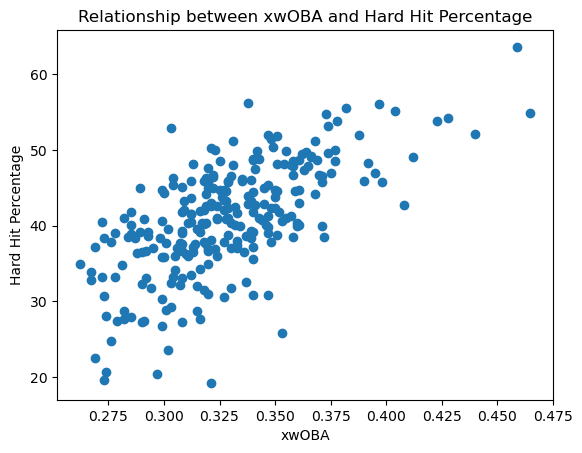

In [21]:
import matplotlib.pyplot as plt

plt.scatter(merged_df_sql['xwoba'], merged_df_sql['hard_hit_pct'])
plt.xlabel('xwOBA')
plt.ylabel('Hard Hit Percentage')
plt.title('Relationship between xwOBA and Hard Hit Percentage')
plt.show()

Lastly, I will do do the same thing with wOBA and hard hit percentage.

In [15]:
# Descriptive statistics for wOBA and hard_hit_pct
descriptive_stats = merged_df_sql[['woba', 'hard_hit_pct']].describe()

# Calculate the correlation between wOBA and hard_hit_pct
correlation = merged_df_sql['woba'].corr(merged_df_sql['hard_hit_pct'])

descriptive_stats, correlation

(             woba  hard_hit_pct
 count  257.000000    257.000000
 mean     0.327833     40.856031
 std      0.033220      7.398198
 min      0.253000     19.200000
 25%      0.306000     37.000000
 50%      0.329000     41.000000
 75%      0.348000     45.900000
 max      0.433000     63.600000,
 0.4931729032132502)

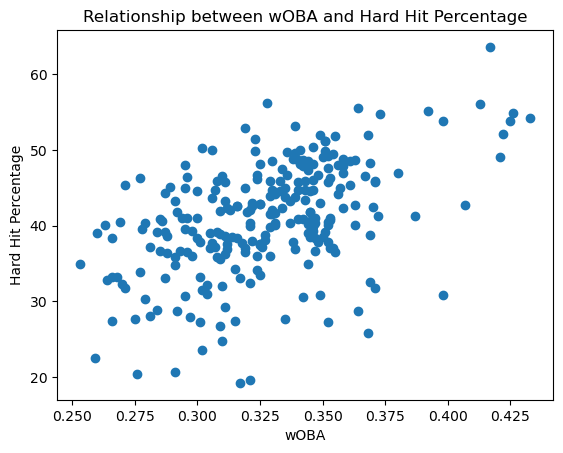

In [23]:
plt.scatter(merged_df_sql['woba'], merged_df_sql['hard_hit_pct'])
plt.xlabel('wOBA')
plt.ylabel('Hard Hit Percentage')
plt.title('Relationship between wOBA and Hard Hit Percentage')
plt.show()

<a id='Section3'></a>
## Examing the Relationship Between xwOBA/wOBA and Hard Hit Percentage

### Hard Hit Percentage's Contribution to xwOBA:

The xwOBA or expected weighted on-base average represents what a player's wOBA should be based on the quality of their contact, without considering the outcomes (like defense).

What our findings suggest:

The correlation between xwOBA and Hard Hit Percentage (r = 0.653)* was moderate to strong. This implies that the quality of contact, as measured by Hard Hit Percentage, is a significant factor influencing xwOBA.

Why this is significant:

- True Offensive Skill: xwOBA aims to measure a player's true skill by eliminating factors they can't control (like a great defensive play or unlucky ball placement). A strong relationship with Hard Hit Percentage emphasizes that players who consistently make good contact will have a higher expected offensive production.

- Sustainability: If a player has a high xwOBA driven by a high Hard Hit Percentage, it suggests their performance is more sustainable and less reliant on luck or external factors.

- Evaluation & Strategy: For teams, understanding the relationship between Hard Hit Percentage and xwOBA can help in player evaluation, acquisitions, and on-field strategies. For instance, against players with high Hard Hit Percentages, defensive shifts or pitching strategies might be employed to counteract their quality of contact.

### Relationship Between wOBA and Hard Hit Percentage:

The correlation we calculated earlier (r = 0.493)* indicated a positive relationship between wOBA and Hard Hit Percentage. This suggests that players who hit the ball hard more frequently tend to have better offensive outcomes, as measured by wOBA.

Why this matters:

- Quality of Contact: Hard Hit Percentage is a direct measure of the quality of contact a batter makes. Hitting the ball harder generally increases the likelihood of the ball landing for a hit and decreases the chance that a defensive player can make a play on it.

- Extra-Base Hits: Balls that are hit hard are more likely to result in extra-base hits (doubles, triples, home runs), which contribute more to scoring than singles. This aligns with the philosophy of wOBA, which assigns higher weights to more valuable hits.

- Predictive Value: Recognizing players with a high Hard Hit Percentage can be valuable for teams and analysts. Even if a player's traditional stats are temporarily down, if they are hitting the ball hard consistently, their numbers might improve over time.

Summary:

Both wOBA and xwOBA are valuable metrics in evaluating a player's offensive prowess, and the quality of contact (as measured by Hard Hit Percentage) plays a crucial role in these evaluations.


*For reference:
0≤∣r∣<0.3: Weak correlation
0.3≤∣r∣<0.7: Moderate correlation
0.7≤∣r∣≤1: Strong correlation

<a id='Section4'></a>
## Sweet Spot of wOBA and Hard Hit Percentage

The "sweet spot" is the where the majority of players fall in terms of their wOBA and Hard Hit Percentage. In the context of a scatter plot (like the one between wOBA and Hard Hit Percentage) it is typically the region where data points are most densely clustered. This region represents the most common combinations of the two variables in the dataset. When we refer to the "sweet spot" in the context of correlation, we're talking about the combination of the two variables that most frequently occurs in the data. To find this we will create a density contour plot to show the sweet spot.

In [25]:
import numpy as np
from scipy.stats import gaussian_kde

# Data
woba_data = merged_df_sql['woba'].values
hhp_data = merged_df_sql['hard_hit_pct'].values

# Create a 2D KDE
data = np.vstack([woba_data, hhp_data])
kde = gaussian_kde(data)

# Define a grid over which we'll evaluate the KDE
woba_range = np.linspace(min(woba_data), max(woba_data), 100)
hhp_range = np.linspace(min(hhp_data), max(hhp_data), 100)
X, Y = np.meshgrid(woba_range, hhp_range)
positions = np.vstack([X.ravel(), Y.ravel()])

# Evaluate the KDE over the grid
Z = kde(positions).reshape(X.shape)

# Find the position of the maximum value of the KDE
max_position = np.unravel_index(np.argmax(Z), Z.shape)
sweet_spot_woba = X[max_position]
sweet_spot_hhp = Y[max_position]

sweet_spot_woba, sweet_spot_hhp

(0.3348181818181818, 43.41818181818182)

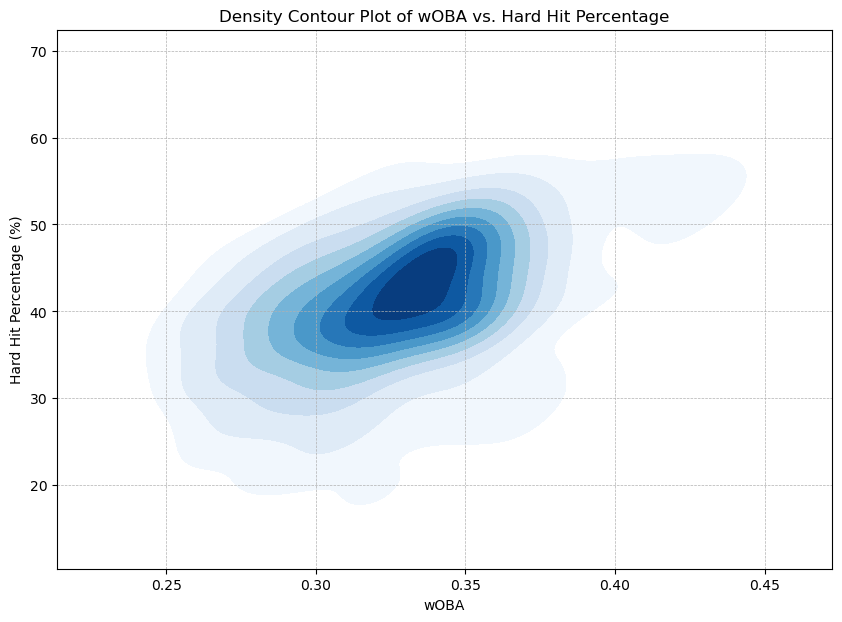

In [24]:
import seaborn as sns

# Setting up the plot
plt.figure(figsize=(10, 7))
sns.kdeplot(data=merged_df_sql, x='woba', y='hard_hit_pct', cmap='Blues', fill=True)

# Adding titles and labels
plt.title('Density Contour Plot of wOBA vs. Hard Hit Percentage')
plt.xlabel('wOBA')
plt.ylabel('Hard Hit Percentage (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

### Sweet Spot (wOBA, Hard Hit Percentage): (0.335, 43.4%)

### Importance of the Sweet Spot:

- Benchmarking: Knowing where the majority of players fall allows teams and analysts to have a benchmark for player performance. If a player is above this benchmark, they are performing better than most in terms of quality of contact and its resulting offensive value.

- Player Evaluation: Teams can use this information to identify players who are under or over-performing relative to the majority.

- Strategic Decisions: For instance, if a team knows that the majority of players achieve a certain wOBA at a specific Hard Hit Percentage, they can adjust their defense or pitching strategy when facing players who are significantly above this benchmark.

- Further Analysis: Upon identification of the sweet spot, we can further delve into what characteristics or skills players in this region share. This could provide insights into training, player development, or acquisition strategies.

<a id='Section5'></a>
## At What Hard Hit Percentage Does wOBA Increase the Most

In order to find the area of hard hit percentage in which an the highest exponential growth of wOBA occurs I will  use Quantile Binning to create 10 bins (deciles) in which each bin has 10% of the players. Players will be placed in a bin based off where their hard percentage ranked among the MLB in 2023 and then used to find the average wOBA of each bin. From there we can find out in which bin does the highest increase in wOBA occur.

In [37]:
# Create decile bins for Hard Hit Percentage
merged_df_sql['hhp_decile'] = pd.qcut(merged_df_sql['hard_hit_pct'], q=10, labels=False, duplicates='drop')

# Calculate average wOBA for each decile bin
average_woba_per_decile = merged_df_sql.groupby('hhp_decile')['woba'].mean()

average_woba_per_decile

hhp_decile
0    0.311115
1    0.304036
2    0.317435
3    0.319000
4    0.322241
5    0.337364
6    0.327840
7    0.329240
8    0.349692
9    0.363500
Name: woba, dtype: float64

In [39]:
import numpy as np

average_woba_values = [0.311115, 0.304036, 0.317435, 0.319000, 0.322241, 0.337364, 0.327840, 0.329240, 0.349692, 0.363500]

# Compute the rate of change of wOBA between consecutive deciles
rate_of_change_woba = np.diff(average_woba_values)

# Identify the decile with the maximum rate of change
max_increase_decile = np.argmax(rate_of_change_woba)
max_increase_value = rate_of_change_woba[max_increase_decile]

max_increase_decile, max_increase_value

(7, 0.020452000000000026)

The data indicates a notable increase in wOBA values between the 7th and 8th deciles of Hard Hit Percentage (0.020). The 7th decile represents players who are in the 70th to 80th percentile of Hard Hit Percentage.

A wOBA increase of 0.020 is significant in baseball. Considering that the typical range for wOBAwOBA is from about 0.200 (poor hitters) to 0.400 (elite hitters), a change of 0.020 is a substantial fraction of this range.

This increase suggests that players who can improve their quality of contact to move from the 7th to the 8th decile (i.e., from the 70-80th percentile to the 80-90th percentile) can expect a significant boost in their offensive contribution.

### Strategic Implications:

- Player Development: For players who are already in the 7th decile, targeted coaching to improve their hitting could potentially move them into the 8th decile. This improvement, while representing just a 10% percentile shift in Hard Hit Percentage, could lead to a notable increase in their offensive value.

- Player Evaluation: When teams evaluate players for trades or signings, understanding these thresholds can be valuable. A player in the 7th decile with the potential to move to the 8th decile might be seen as having a high upside.

### Interplay of Metrics:

- Hard Hit Percentage as an Indicator: Hard Hit Percentage, in essence, measures the quality of contact. The data suggests that as players move into the higher echelons of quality of contact (from the 7th to the 8th decile), their overall offensive effectiveness, as measured by wOBA, rises significantly. This underlines the importance of not just making contact but making good contact.

- Beyond Just Hard Hits: While the Hard Hit Percentage is crucial, the variation in wOBA values across other deciles hints at the multifaceted nature of baseball offense. Other factors, like plate discipline, speed, and situational awareness, also play vital roles. However, the sharp increase between the 7th and 8th deciles underscores that quality of contact remains a paramount factor.

In summary, the data paints a clear picture: achieving a Hard Hit Percentage that places a player among the top 20% can lead to a significant uptick in offensive production.

 <a id='Section6'></a>
 ## Other Statistics Correlated with wOBA
 
 After examing the correlation between hard hit percentage and the overall benefits of increasing hard hit percentage it is worth researching if what other statistics are correlated with wOBA.

In [44]:
import pandas as pd

data = pd.read_csv('/Users/kylebrown/Documents/Baseball_Savant_Data.csv')

correlations = data.corr(numeric_only=True)['woba'].drop('woba').sort_values(ascending=False)

print(correlations)

slg                      0.919222
xwoba                    0.843180
x_slg                    0.765593
ba                       0.698853
barrels                  0.652958
brl_pa                   0.609396
x_ba                     0.552567
brl_percent              0.550465
avg_hit_speed            0.529702
ev95plus                 0.514235
hard_hit_pct             0.493173
fb_ld                    0.482786
max_distance             0.439959
avg_distance             0.421974
max_hit_speed            0.387029
pa                       0.382194
gb                       0.309238
xba_minus_ba_diff        0.289203
attempts                 0.284738
bip                      0.284738
angle_sweet_spot_pct     0.274799
avg_hr_distance          0.240169
xwoba_minus_woba_diff    0.231168
xslg_minus_slg_diff      0.198623
avg_hit_angle            0.170586
player_id               -0.003295
Name: woba, dtype: float64


When reviewing the correlation of all statistics in the dataset with wOBA, we find that there are a few others that may be more closely related. Some of the more correlated stats such as slugging pct and xwOBA are obviously more correlated as they are part of the equation that makes up wOBA. But one statistic to focus on is average exit velocity.

Both average exit velocity and hard hit percentage are measures of the quality of contact a batter makes. However, they represent slightly different aspects of hitting, and their correlation with wOBA can shed light on their relative importance in predicting overall offensive value. 

Consistency vs. Peaks:

- Average Hit Speed (Average Exit Velocity): This metric represents the average speed at which balls leave the bat over a period. A higher average suggests consistent, solid contact.

- Hard Hit Percentage: This metric represents the percentage of batted-ball events that exceed a certain exit velocity threshold (e.g., 95 mph). It focuses on the frequency of hard-hit balls rather than the average strength of all hits.

A player might have a high hard hit percentage by frequently hitting balls just over the threshold (e.g., consistently at 96 mph). Another player might have a slightly lower hard hit percentage but hits balls at a wider range of high exit velocities, sometimes reaching much higher speeds like 105 mph or more. This player's average exit velocity might be higher because of those peak values. In such scenarios, the player with the higher average exit velocity might have a better chance of achieving positive outcomes, even if their hard hit percentage is slightly lower.

In summary, while both metrics are valuable in evaluating a player's quality of contact, average hit speed provides a more holistic view of a player's hitting prowess. Its stronger correlation with wOBA suggests that consistent, solid contact across all at-bats might be more predictive of overall offensive value than just the frequency of hard-hit balls.

<a id='Section7'></a>
## Conclusion

Based on our findings we can conclude that...

wOBA and hard hit percentage have a positive relationship with one another in 2023 (r = 0.493). Suggesting that players who hit the ball hard more frequently tend to have better offensive outcomes, as measured by wOBA. This can be important when evaluating a struggling player or perhaps a player in the minor leagues because this gives evidence to the idea if a player's traditional stats are temporarily down or not as high as expected, if they are hitting the ball hard consistently, their numbers might improve over time.

The sweet spot of wOBA and hard hit percentage for 2023 is (0.335, 43.4%). Knowing where the majority of players fall allows teams and analysts to have a benchmark for player performance. If a player is above this benchmark, they are performing better than most in terms of quality of contact and its resulting offensive value. This can provide valuable player evaluation thats teams can use to identify players who are under or over-performing relative to the majority.

When making the jump from the top 30% of players into the top 20% of players in terms of hard hit percentage, you can expect the largest increase in wOBA (.020), a significant uptick in offensive proudction. Targeted coaching to improve a player's hard hit percentage could lead to a notable increase in their offensive value when a player is close to this threshold.

As great as an indicator hard hit percentage may be for offensive production in either the current season or the future, there may be other statistics that warrant a similar causation for an uptick in wOBA value, such as average exit velocity. Without diving further into this data, it may be possible that solid contact across all at bats may be of more value than frequency of hard hit balls.

<a id='Section8'></a>
## Further Comments

### Issues I had during research:

- When I initially began binning the players I decided to bin them in ranges of 5%. This in turn gave me skewed data, for example, Aaron Judge is the only player above the 60% mark. From there I decided to move to quantile binning to get an even set of players in each bin and achieve a more well-rounded binning system to fit my data set.